<h3>What are the main characteristics that have the most impact on the car price?</h3>


Importing libraries: 


In [2]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
%pip install seaborn 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
df = pd.read_csv('cleaned_auto.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,12.368421,Medium,0,1,1,0,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,9.791667,Low,0,1,1,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,13.055556,Low,0,1,1,0,1,0,1,0


<h2 id="pattern_visualization"> Analyzing Individual Feature Patterns Using Visualization</h2>


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [15]:
# list the data types for each column
print(df.dtypes)

symboling               int64
normalized-losses       int64
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg           float64
price                 float64
city-L/100km          float64
horsepower-binned      object
fuel-type-diesel        int64
fuel-type-gas           int64
aspiration-std          int64
aspiration-turbo        int64
aspiration-std.1        int64
aspiration-turbo.1      int64
aspiration-std.2        int64
aspiration

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233,-0.218233,0.218233,-0.218233,0.218233


The correlation between bore, stroke, compression-ratio, and horsepower


In [17]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()


,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


The scatterplot of "engine-size" as a potential predictor of the price and "price".


(0.0, 53392.79842570081)

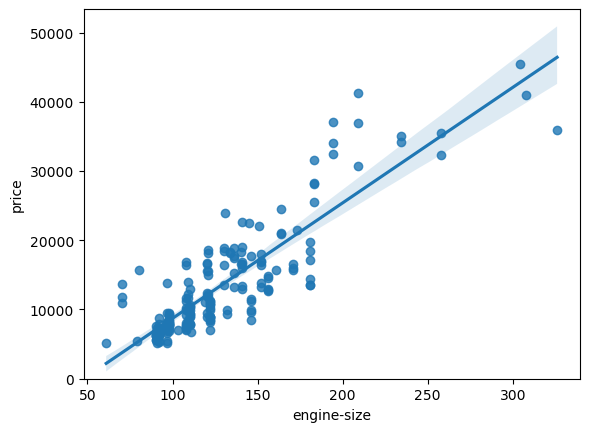

In [18]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>It shows a positive linear relationship as the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


 The correlation between 'engine-size' and 'price' and see that it's approximately 0.87.


In [19]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The relationship between "peak-rpm" and "price".


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

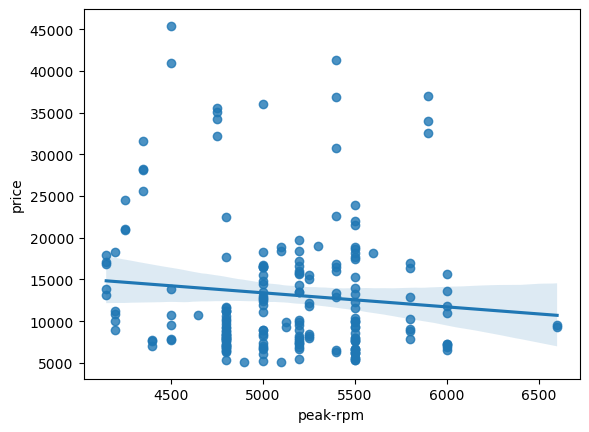

In [22]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>


The correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.


In [23]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 
<p>The correlation  between "stroke" and "price".</p>



In [24]:
df[["stroke","price"]].corr()


,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

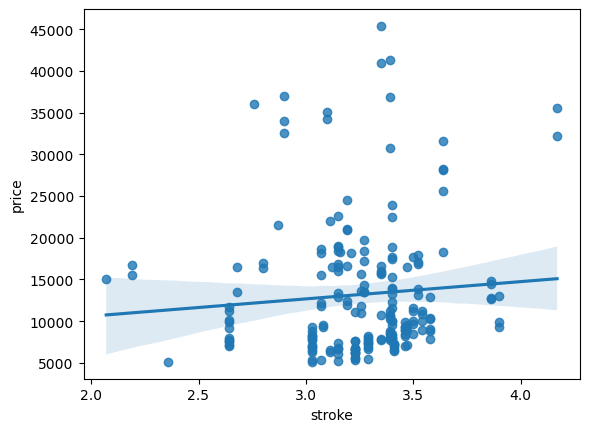

In [25]:
sns.regplot(x="stroke", y="price", data=df)


 
We can see that There is a weak correlation between the variable 'stroke' and 'price.'

The relationship between "body-style" and "price".


<AxesSubplot:xlabel='body-style', ylabel='price'>

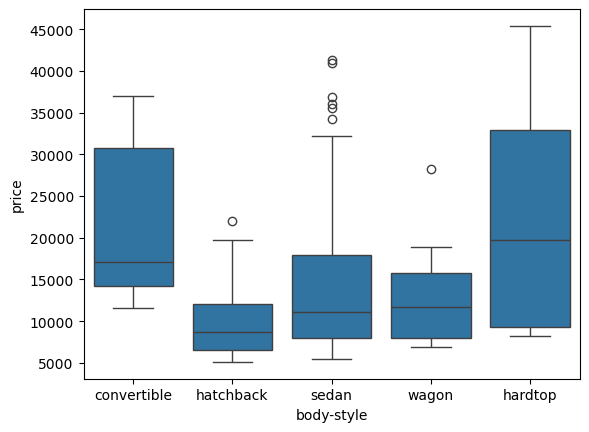

In [26]:
sns.boxplot(x="body-style", y="price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 
"engine-location" and "price":</p>


<AxesSubplot:xlabel='engine-location', ylabel='price'>

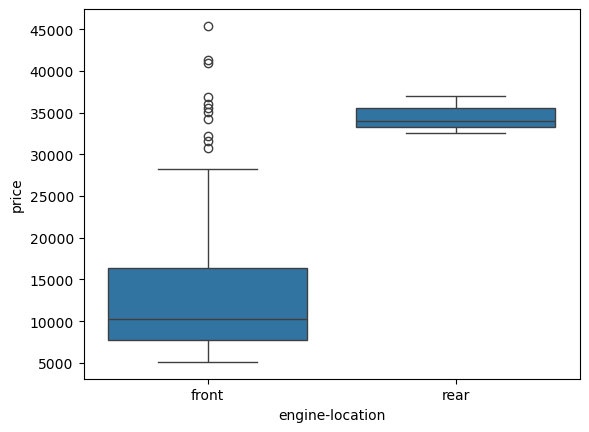

In [27]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>


 "drive-wheels" and "price".


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

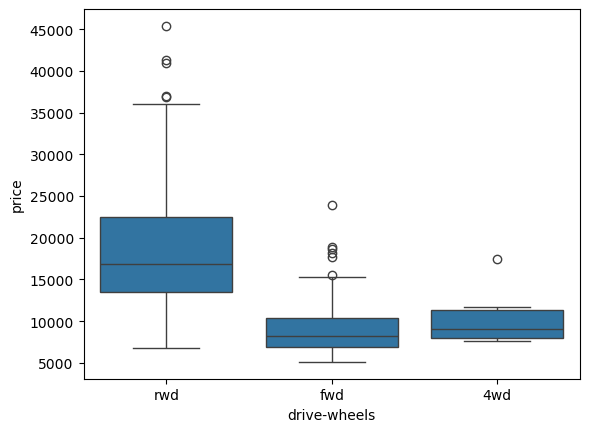

In [28]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


<h2 id="discriptive_statistics">Descriptive Statistical Analysis</h2>


In [29]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104,0.820896,0.179104,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397,0.384397,0.384397,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


<h3>Value Counts</h3>


In [33]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


 Renaming the index to 'drive-wheels':


In [34]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repeating the above process for the variable 'engine-location'.


In [35]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>We see that engine location would not be a good predictor variable for the price. Because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>


<h2 id="basic_grouping">Grouping</h2>



<p>Grouping by the variable "drive-wheels". </p>


In [36]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)


<p>We see that there are 3 different categories of drive wheels.</p>


<p>Grouping "drive-wheels" and then average them to see which type of drive wheel is most valuable.</p>


In [37]:
df_group_one = df[['drive-wheels','body-style','price']]

Calculating the average price for each of the different categories of data.


In [38]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

<ipython-input-38-10e240e527d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

<p>Grouping by both 'drive-wheels' and 'body-style'.</p>


In [39]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Converting the dataframe to a pivot table</p>


In [40]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [41]:
grouped_pivot = grouped_pivot.fillna(0) #filling missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222


Finding the average "price" of each car based on "body-style".


In [42]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Using a heat map to visualize the relationship between Body Style vs Price.


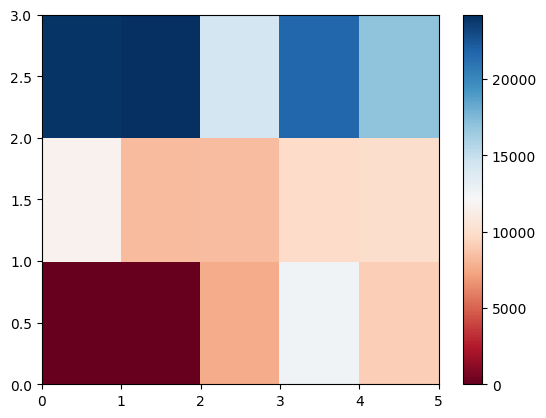

In [43]:
#using the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

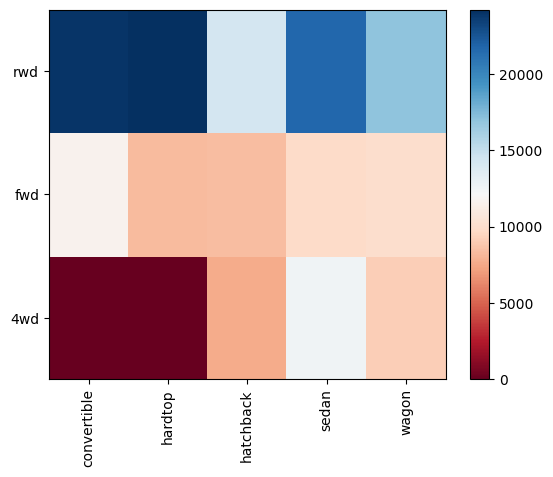

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation">Correlation and Causation</h2>


In [45]:
df.corr()

<ipython-input-45-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615,0.054615,-0.054615,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911,0.006911,-0.006911,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889,-0.256889,0.256889,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085,-0.230085,0.230085,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732,-0.305732,0.305732,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336,-0.090336,0.090336,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955,-0.321955,0.321955,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040,-0.110040,0.110040,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816,-0.227816,0.227816,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233,-0.218233,0.218233,-0.218233,0.218233


 Obtaining "stats" module in the "scipy"  library.


In [46]:
from scipy import stats

<h3>Calculating the  Pearson Correlation Coefficients and P-values of different variables and 'price'.</h3>


<h3>Wheel-Base vs. Price</h3>


In [47]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655085  with a P-value of P = 8.076488270732338e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>


In [48]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571051  with a P-value of P =  6.273536270651025e-48


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>


In [49]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483643  with a P-value of P =  8.016477466158871e-30


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>


In [50]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522663  with a P-value of P = 9.200335510485071e-38


#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


### Curb-Weight vs. Price


In [51]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702845  with a P-value of P =  2.1895772388939654e-53


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>


In [52]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455188  with a P-value of P = 9.26549162219582e-64


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>


In [53]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626601  with a P-value of P =   8.049189483935384e-17


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


<h3>City-mpg vs. Price</h3>


In [54]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P =  2.3211320655672357e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


<h3>Highway-mpg vs. Price</h3>


In [55]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981971  with a P-value of P =  3.0467845810419822e-46


#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


<h3>Doing ANOVA on Drive Wheels</h3>



<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [56]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [57]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [58]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [59]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. 
Examining to see if all three tested groups are all this highly correlated


#### fwd and rwd


In [60]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd


In [61]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<h4>4wd and fwd</h4>


In [62]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


ANOVA for the categories '4wd' and 'fwd' yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.


<h3>Conclusion: Important Variables</h3>


<p>The important variables to take into account when predicting the car price:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>
